In [1]:
import numpy as np 
import pandas as pd
import os
import gc
import pickle
import tensorflow as tf
print(tf.__version__)

2.7.0


#### Load preprocessed dataset

In [2]:
with open('./data/train_vector.pkl', 'rb') as f:
    X = pickle.load(f)

with open('./data/feature_names.pkl', 'rb') as f:
    feature_names = pickle.load(f)
    
with open('./data/yvalues.pkl', 'rb') as f:
    y = pickle.load(f)

print(X.shape[1],y.shape, len(feature_names))

1037 (307511,) 1037


In [3]:
# for NN need to pass dense vector
X = X.todense()

#### testing purpose only
traindata=50000
X = X[:traindata,:]
y = y[:traindata]

#### Split Data into Train, CV and Test data

In [4]:
from sklearn.model_selection import train_test_split

X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)
X_train,X_cv,y_train,y_cv =train_test_split(X_tr,y_tr,test_size=0.33,stratify=y_tr,random_state=42)

In [5]:
gc.enable()
del X,y
gc.collect()

0

In [6]:
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_cv = label_encoder.transform(y_cv)
y_test = label_encoder.transform(y_test)

print(y_train[1])
print(y_cv[1])
print(y_test[1])

0
0
0


In [7]:
print('X_train shape {}'.format(X_train.shape))
print('X_cv shape {}'.format(X_cv.shape))
print('X_test shape {}'.format(X_test.shape))

X_train shape (138041, 1037)
X_cv shape (67991, 1037)
X_test shape (101479, 1037)


In [8]:
gc.enable()
del X_tr,y_tr
gc.collect()

0

#### Modeling

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense,Flatten,Dropout,BatchNormalization
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.regularizers import l2
import random as rn

In [10]:
os.environ['PYTHONHASHSEED'] = '0'
## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

#clear the session 
tf.keras.backend.clear_session()

#initializer
initializer = tf.keras.initializers.glorot_normal(seed=0)
#initializer =tf.keras.initializers.he_normal(seed=0)
act_layer = tf.keras.layers.LeakyReLU(alpha=0.0655)
l2_reg =l2(0.0012)
#Input Layer: Categorical features, Numerical features
input_layer = Input(shape=(X_train.shape[1],),name='input_layer')

#flat the input layer
flat_layer = Flatten()(input_layer)   

# Dense layer 1 layer
Dense1 =Dense(32, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(flat_layer)
#batch Normalization
bn1 = BatchNormalization()(Dense1)
# dropout after batch norm 1
drop1 =Dropout(0.25)(bn1)

# Dense layer after drop1
Dense2 =Dense(64, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop1)
#batch Normalization
bn2 = BatchNormalization()(Dense2)
# dropout after batch norm 2
drop2 =Dropout(0.25)(bn2)

# Dense layer after drop2
Dense3 =Dense(128, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop2)
#batch Normalization
bn3 = BatchNormalization()(Dense3)
# dropout after batch norm 3
drop3 =Dropout(0.25)(bn3)

# Dense layer after drop 3
Dense4 =Dense(256, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop3)
#batch Normalization
bn4 = BatchNormalization()(Dense4)
# dropout after batch norm 4
drop4 =Dropout(0.25)(bn4)

# Dense layer after drop 4
Dense5 =Dense(512, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop4)
#batch Normalization
bn5 = BatchNormalization()(Dense5)
# dropout after batch norm 5
drop5 =Dropout(0.4)(bn5)

# Dense layer after drop5
Dense6 =Dense(1024, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop5)
#batch Normalization
bn6 = BatchNormalization()(Dense6)
# dropout after batch norm 6
drop6 =Dropout(0.5)(bn6)

# Dense layer after drop6
Dense7 =Dense(512, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop6)
#batch Normalization
bn7 = BatchNormalization()(Dense7)
# dropout after batch norm 7
drop7 =Dropout(0.4)(bn7)

# Dense layer after drop7
Dense8 =Dense(128, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop7)
#batch Normalization
bn8 = BatchNormalization()(Dense8)
# dropout after batch norm 8
drop8 =Dropout(0.2)(bn8)


# Dense layer after dropout 8 
Dense9 =Dense(32, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop8)
#batch Normalization
bn9 = BatchNormalization()(Dense9)
# dropout after batch norm 9
drop9 =Dropout(0.2)(bn9)

# Dense layer after dropout 9
Dense10 =Dense(16, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop9)
#batch Normalization
bn10 = BatchNormalization()(Dense10)
# dropout after batch norm 10
drop10 =Dropout(0.2)(bn10)

# Dense layer after dropout 10
Dense11 =Dense(8, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop10)
#batch Normalization
bn11 = BatchNormalization()(Dense11)
# dropout after batch norm 11
drop11 =Dropout(0.2)(bn11)

# Dense layer after dropout 11 
Dense12 =Dense(4, activation=act_layer,kernel_initializer=initializer,kernel_regularizer=l2_reg)(drop11)

#output layer
output =Dense(1, activation='sigmoid',name='output')(Dense12)

#adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=8e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adam')

#finally define the Model
model = Model(inputs=input_layer,outputs=output)

#compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy',  metrics=['accuracy'])

#summary
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1037)]            0         
                                                                 
 flatten (Flatten)           (None, 1037)              0         
                                                                 
 dense (Dense)               (None, 32)                33216     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                             

#### Custom Callback function

In [11]:
import tensorflow.keras
import sklearn.metrics
from sklearn.metrics import roc_curve, auc,roc_auc_score

class CustomMetrics(tf.keras.callbacks.Callback):
    def __init__(self,validation_data):
        super(CustomMetrics, self).__init__()
        self.X_val = validation_data[0]
        self.y_val = validation_data[1]
        self.auc =[]
    def on_train_begin(self, logs={}):
        self.customMetrics={'val_accuracy':[], 'roc_auc':[],'val_loss':[],'loss':[]}
    def on_epoch_end(self, epoch, logs={}):
        #If you are getting any NaN values(either weigths or loss) while training, you have to terminate your training.
        if logs.get('loss') is None:
            if np.isnan(logs.get('loss')) or np.isinf(logs.get('loss')):
                print("Invalid loss and terminated at epoch {}".format(epoch))
                self.model.stop_training = True
        elif logs.get('loss')<=0.01:
            print('loss has reduced below 001. Hence stop training!!!')
            self.model.stop_training = True
        elif np.round(logs.get('val_accuracy'),2)>=0.98:
            print('validation accuracy reached over 98%. Hence stop training to avoid overfitting!!!')
            self.model.stop_training = True

        self.customMetrics['val_loss'].append(logs.get('val_loss'))
        self.customMetrics['loss'].append(logs.get('loss'))
        self.customMetrics['val_accuracy'].append(logs.get('val_accuracy'))
        try:
            y_pred = np.asarray(self.model.predict(self.X_val))
            y_true = self.y_val        
            self.customMetrics['roc_auc'].append(sklearn.metrics.roc_auc_score(y_true, y_pred))
        except ValueError:
            pass
        
        self.auc.append(roc_auc_score(y_true,y_pred))
        print('-\tauc  : {:.4f}'.format(roc_auc_score(y_true,y_pred)))
        return
metrics=CustomMetrics(validation_data=(X_cv,np.array(y_cv)))
#metrics=CustomMetrics()

In [12]:
def changeLearningRate(epoch,lr): 
    #val_acc = metrics.customMetrics['val_acc'] 
    changed = lr #default condition
    if epoch <= 1: 
        changed = lr
    #Cond2. For every 3rd epoch, decay your learning rate by 4%.
    elif epoch > 1 and epoch%3==0:
        changed = lr*(1-0.050)
        print('reducing learing rate with 5% on every 3rd epoch {} '.format(changed))
    else:
        changed = lr*(1-0.03)
        print('reducing learing rate with 3% ~~> {}'.format(changed))
    return changed

In [13]:
%load_ext tensorboard
#%reload_ext tensorboard
logs_base_dir = "/logs/fit/NN/"
os.makedirs(logs_base_dir, exist_ok=True)

In [14]:
from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train),y_train)
#class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced', np.unique(y_train),y_train))) 
#y_integers = np.argmax(y_train, axis=1)
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=[0,1], y=y_train)
d_class_weights = dict(enumerate(class_weights))
d_class_weights

{0: 0.5439096274931637, 1: 6.193512203876526}

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,LearningRateScheduler
import datetime

#learning rate and EarlyStop
lrschedule = LearningRateScheduler(changeLearningRate, verbose=1)
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=5, verbose=1)
    
#log directory for tensor board
logdir=os.path.join(os.getcwd()+ "/logs/fit/NN/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=0,profile_batch = '500,520')
#saving model 
filepath=os.path.join(os.getcwd()+ "/model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5")
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')
    
#model fit
model_history=model.fit(X_train,y_train, class_weight=d_class_weights,
                    validation_data=(X_cv,y_cv),epochs=30, batch_size=1024,
                    callbacks=[tensorboard_callback,metrics,lrschedule,earlystop,checkpoint])


Epoch 00001: LearningRateScheduler setting learning rate to 0.0007999999797903001.
Epoch 1/30
135/135 [==============================] - ETA: 0s - loss: 3.2087 - accuracy: 0.6478-	auc  : 0.7106

Epoch 00001: val_accuracy improved from -inf to 0.63160, saving model to C:\DS\1. AAIC\001.0ML.Project\26.repayloaan/model_save\weights-01-0.6316.hdf5
135/135 [==============================] - 19s 123ms/step - loss: 3.2087 - accuracy: 0.6478 - val_loss: 2.8256 - val_accuracy: 0.6316 - lr: 8.0000e-04

Epoch 00002: LearningRateScheduler setting learning rate to 0.0007999999797903001.
Epoch 2/30
135/135 [==============================] - ETA: 0s - loss: 2.4410 - accuracy: 0.6606-	auc  : 0.7394

Epoch 00002: val_accuracy did not improve from 0.63160
135/135 [==============================] - 17s 124ms/step - loss: 2.4410 - accuracy: 0.6606 - val_loss: 2.1007 - val_accuracy: 0.6252 - lr: 8.0000e-04
reducing learing rate with 3% ~~> 0.0007759999803965911

Epoch 00003: LearningRateScheduler setting 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix

sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

#### AUC curve

In [17]:
X_train = np.vstack((X_train,X_cv))
y_train = np.concatenate([y_train,y_cv],axis=0)

In [18]:
print(y_train.shape,X_train.shape)

(206032,) (206032, 1037)


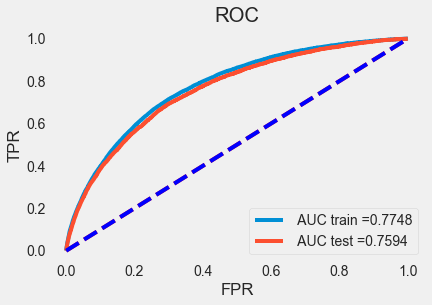

0.7747983581706509 0.759354922850861


In [19]:
#train data predict
y_tr_pred = model.predict(X_train, batch_size=512)
#test data predict
y_te_pred = model.predict(X_test,batch_size=512)

#fpr,tpr,thresholds 
fpr, tpr, thresholds = roc_curve(y_train, y_tr_pred)

#auc score train score
auc_train = roc_auc_score(y_train, y_tr_pred)

plt.plot(fpr, tpr, label=" AUC train ="+str("{:.4f}".format(auc_train)))
plt.plot([0, 1], [0, 1],'r--')
    
fpr, tpr, thresholds = roc_curve(y_test, y_te_pred)
#auc score test score
auc_test = roc_auc_score(y_test, y_te_pred)
plt.plot(fpr, tpr, label=" AUC test ="+str("{:.4f}".format(auc_test)))
plt.plot([0, 1], [0, 1],'b--')

plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC" )
plt.grid()
plt.show()

print(auc_train,auc_test)

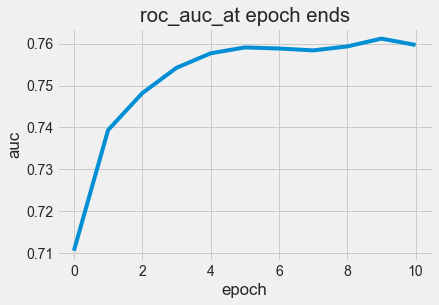

In [20]:
plt.plot(metrics.customMetrics['roc_auc'])
plt.title('roc_auc_at epoch ends')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.show()

#### Plot Model

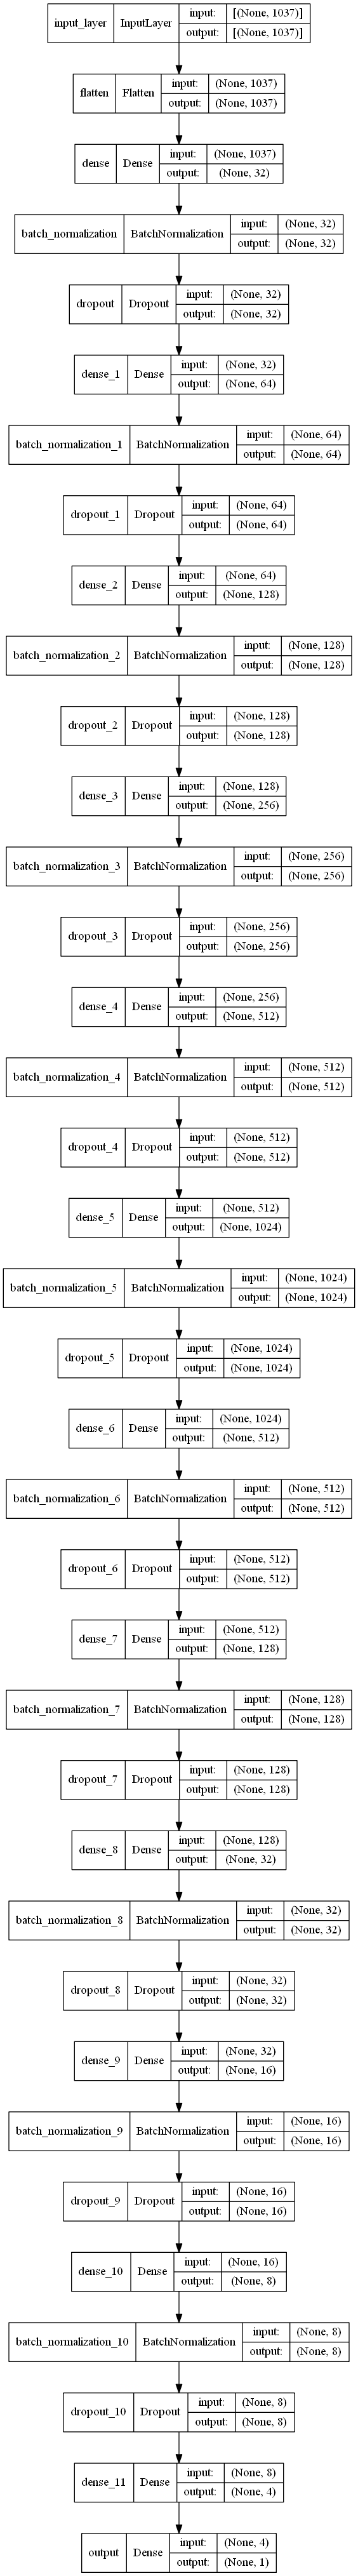

In [21]:
from tensorflow.keras.utils import plot_model
#finally summary
plot_model(model, show_shapes=True, to_file='./results/26_Loan_predict_phase4-NN.png')

#### Tensorboard

In [22]:
%reload_ext tensorboard
%tensorboard --logdir logs

#### plot train vs validation accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


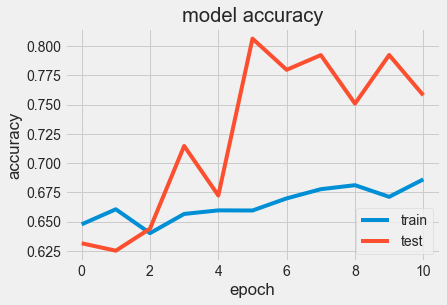

In [23]:
#reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#### plot learning rate

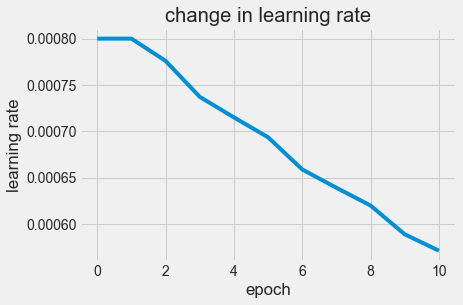

In [24]:
#reference: https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for learning rate
plt.plot(model_history.history['lr'])
plt.title('change in learning rate')
plt.ylabel('learning rate')
plt.xlabel('epoch')
plt.show()

#### plot Train vs validation loss

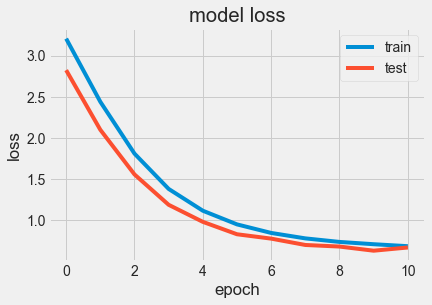

In [25]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

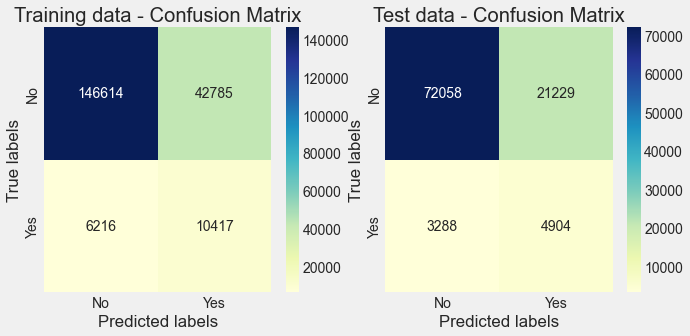

In [31]:
#https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
def plot_confusionmatrix(y_tr,y_trpred,y_te,y_tepred):
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_tr, np.round(y_trpred)).ravel()    
    #print('Training data tn-> {}, fp-> {}, fn-> {}, tp-> {}'.format(tn, fp, fn, tp), end=" ")
    #confusion matrix on training data 
    plt.figure(figsize=(10, 10))
    ax_tr = plt.subplot(221)
    cm_tr = confusion_matrix(y_tr, np.round(y_trpred))
    plt.title("Training data - Confusion Matrix")
    sns.heatmap(cm_tr, ax=ax_tr, fmt='d',cmap='YlGnBu',annot=True)
    # labels, title and ticks
    ax_tr.set_xlabel('Predicted labels');
    ax_tr.set_ylabel('True labels'); 
    ax_tr.set_ylim(2.0, 0)
    ax_tr.xaxis.set_ticklabels(['No','Yes']); 
    ax_tr.yaxis.set_ticklabels(['No','Yes']);
    
    #Confusion matrix on test data
    tn, fp, fn, tp = confusion_matrix(y_te, np.round(y_tepred)).ravel()    
    #print('Testing data tn-> {}, fp-> {}, fn-> {}, tp-> {}'.format(tn, fp, fn, tp), end=" ")
    
    ax_te = plt.subplot(222)
    cm_te = confusion_matrix(y_te, np.round(y_tepred))
    plt.title("Test data - Confusion Matrix")
    sns.heatmap(cm_te, ax=ax_te, fmt='d',cmap='YlGnBu',annot=True)
    # labels, title and ticks
    ax_te.set_xlabel('Predicted labels');
    ax_te.set_ylabel('True labels'); 
    ax_te.set_ylim(2.0, 0)
    ax_te.xaxis.set_ticklabels(['No','Yes']); 
    ax_te.yaxis.set_ticklabels(['No','Yes']);

    plt.show()
    return
plot_confusionmatrix(y_train,y_tr_pred,y_test,y_te_pred)

In [27]:
filepath=os.path.join(os.getcwd()+ "./results/NN-model.hdf5")
tf.keras.models.save_model(model, filepath, overwrite=True, include_optimizer=True, save_format=None,
                            signatures=None, options=None, save_traces=True)

In [28]:
y_tr_pred_classes =np.round(y_tr_pred).reshape(-1,1).astype(int)
y_te_pred_classes = np.round(y_te_pred).reshape(-1,1).astype(int)

In [29]:
target_names=np.unique(y_tr_pred_classes).astype(int).astype(str)

In [30]:
from sklearn.metrics import classification_report
print("Train Results")
print("*"*55)
print(classification_report(y_train,y_tr_pred_classes, target_names= target_names))
print("*"*55)
print("Test Results")
print("*"*55)
print(classification_report(y_test,y_te_pred_classes, target_names=target_names))

Train Results
*******************************************************
              precision    recall  f1-score   support

           0       0.96      0.77      0.86    189399
           1       0.20      0.63      0.30     16633

    accuracy                           0.76    206032
   macro avg       0.58      0.70      0.58    206032
weighted avg       0.90      0.76      0.81    206032

*******************************************************
Test Results
*******************************************************
              precision    recall  f1-score   support

           0       0.96      0.77      0.85     93287
           1       0.19      0.60      0.29      8192

    accuracy                           0.76    101479
   macro avg       0.57      0.69      0.57    101479
weighted avg       0.89      0.76      0.81    101479

